Collection 안에 포함된 모듈을 이용.

- Collections
- Data Structure
- deque
- Counter
- orderedDict
- defaultdict
- namedtuple

### Collections

- List, Tuple, Dict에 대한 Python Built-in 확장 자료 모듈.
- 편의성, 실행 효율 등을 사용자에게 제공.
- 아래의 모듈이 존재.
    - deque
    - Counter
    - OrderedDict
    - defaultdict
    - namedtuple

### 1. deque

- Stack과 Queue를 지원.
- List에 비해 효율적인 자료 저장 방식.

In [2]:
from collections import deque

deque_list = deque()
for i in range(5):
    deque_list.append(i)
print(deque_list)

deque([0, 1, 2, 3, 4])


In [3]:
deque_list.appendleft(10)
print(deque_list)

deque([10, 0, 1, 2, 3, 4])


- rotate, reverse등 Linked List의 특성 지원.
- 기존 list 형태의 함수를 모두 지원.

In [8]:
deque_list.rotate(2)
print(deque_list)

deque_list.rotate(2)
print(deque_list)

deque([2, 3, 10, 0, 1])
deque([0, 1, 2, 3, 10])


In [9]:
deque_list.extend([5, 6, 7])
print(deque_list)

deque([0, 1, 2, 3, 10, 5, 6, 7])


In [10]:
deque_list.extendleft([5, 6, 7])
print(deque_list)

deque([7, 6, 5, 0, 1, 2, 3, 10, 5, 6, 7])


In [11]:
print(deque_list)
print(deque(reversed(deque_list)))

deque([7, 6, 5, 0, 1, 2, 3, 10, 5, 6, 7])
deque([7, 6, 5, 10, 3, 2, 1, 0, 5, 6, 7])


효율적 메모리 구조로 처리 속도 향상.

In [14]:
# deque
from collections import deque
import time

start_time = time.time()
deque_list = deque()
# Stack
for i in range(10000):
    for i in range(10000):
        deque_list.append(i)
        deque_list.pop()
        
print(time.time() - start_time, 'seconds')

10.39016604423523 seconds


In [16]:
# general list
import time

start_time = time.time()
just_list = []
for i in range(10000):
    for i in range(10000):
        just_list.append(i)
        just_list.pop()
        
print(time.time() - start_time, 'seconds')

33.16887712478638 seconds


### OrderedDict

- Dict와 달리, 데이터를 입력한 순서대로 dict를 반환.

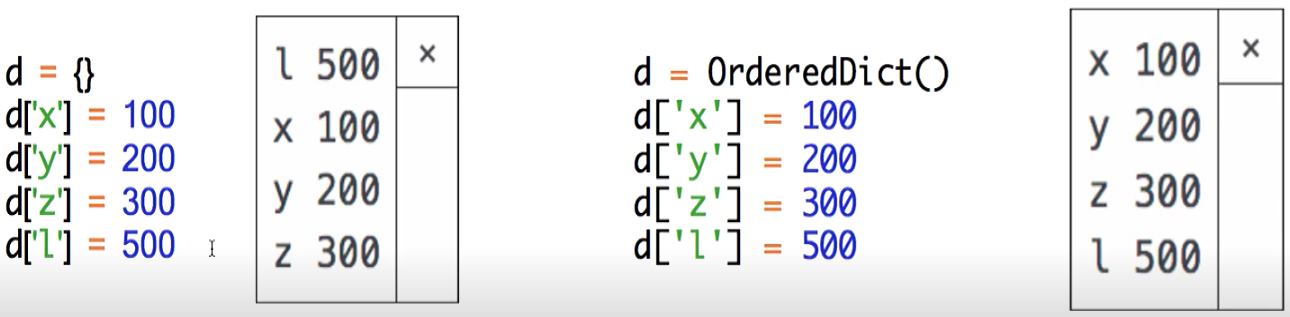

In [19]:
from collections import OrderedDict

In [26]:
d = {}
d['x'] = 100
d['y'] = 200
d['z'] = 300
d['l'] = 500

for k, v in d.items():
    print(k, v)

x 100
y 200
z 300
l 500


In [25]:
d = OrderedDict()
d['x'] = 100
d['y'] = 200
d['z'] = 300
d['l'] = 500

for k, v in d.items():
    print(k, v)

x 100
y 200
z 300
l 500


Dict type의 값을, value 또는 key 값으로 정렬할 때 사용 가능.

In [23]:
for k, v in OrderedDict(sorted(d.items(), key=lambda t: t[0])).items():
    print(k, v)

l 500
x 100
y 200
z 300


In [27]:
for k, v in OrderedDict(sorted(d.items(), key=lambda t: t[1])).items():
    print(k, v)

x 100
y 200
z 300
l 500


### defaultdict

- dict type의 값에 기본 값을 지정, 신규값 생성 시 사용하는 방법.

In [28]:
d = dict()
print(d['first']) # first라고 하는 key 값이 존재하지 않음. error.

KeyError: 'first'

In [31]:
from collections import defaultdict

d = defaultdict(object) # Default dictionary를 생성.
d = defaultdict(lambda: 0) # Default 값을 0으로 설정.
print(d['first'])

0


글자수 세기

In [33]:
from collections import OrderedDict, defaultdict

'''
# defaultdict를 사용하지 않는다면?

word_count = {}
for word in text:
    if word in word_count.keys():
        word_count[word] += 1
    else:
        word_count[word] = 1 # 존재하지 않으면 새로운 키를 만들고 1로 지정.
print(word_count)
'''

word_count = defaultdict(object)
word_count = defaultdict(lambda: 1)

for word in text:
    word_count[word] += 1
    
for i, v in OrderedDict(sorted(
        word_count.items(), key=lambda t: t[1],
        reverse=True)).items():
    print(i, v)

NameError: name 'text' is not defined

### Counter

- Sequence type의 data element들의 개수를 dict로 반환.

In [35]:
from collections import Counter

c = Counter() # a new, empty counter
c = Counter('gallahad') # a new counter from an iterable
print(c)

Counter({'a': 3, 'l': 2, 'g': 1, 'h': 1, 'd': 1})


- Dict type, keyword parameter 등도 모두 처리 가능

In [36]:
c = Counter({'red':4, 'blue':2}) # a new counter from a mapping
print(c)
print(list(c.elements()))

Counter({'red': 4, 'blue': 2})
['red', 'red', 'red', 'red', 'blue', 'blue']


In [37]:
c = Counter(cats=4, dogs=8) # a new counter from keyword args
print(c)
print(list(c.elements()))

Counter({'dogs': 8, 'cats': 4})
['cats', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs']


### namedtuple

- Tuple형태로 Data 구조체를 저장하는 방식.
- 저장되는 data의 variable을 사전에 지정해서 저장.

In [38]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])
p = Point(11, y=22)
print(p[0] + p[1])

33


In [39]:
x, y = p
print(x, y)
print(p.x + p.y)
print(Point(x=11, y=22))

11 22
33
Point(x=11, y=22)
